<a href="https://colab.research.google.com/github/DebarajPurohit/car-price-prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### <b>Problem Statement</b>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

#### <b> Business Goal</b>
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 4: MACHINE LEARNING/projects/Car Price Prediction/CarPrice_project.csv')

In [4]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
dataset.shape

(205, 26)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### <b>DataSet Information:</b>

Car_ID: Unique id of each observation (Interger)

Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

CarName: Name of car company (Categorical)

fueltype: Car fuel type i.e gas or diesel (Categorical)

aspiration: Aspiration used in a car (Categorical)

doornumber: Number of doors in a car (Categorical)

carbody: body of car (Categorical)

drivewheel: type of drive wheel (Categorical)

enginelocation: Location of car engine (Categorical)

wheelbase: Weelbase of car (Numeric)

carlength: Length of car (Numeric)

carwidth: Width of car (Numeric)

carheight: height of car (Numeric)

curbweight: The weight of a car without occupants or baggage. (Numeric)

enginetype: Type of engine. (Categorical)

cylindernumber: cylinder placed in the car (Categorical)

enginesize: Size of car (Numeric)

fuelsystem: Fuel system of car (Categorical)

boreratio: Boreratio of car (Numeric)

stroke: Stroke or volume inside the engine (Numeric)

compressionratio: compression ratio of car (Numeric)

horsepower: Horsepower (Numeric)

peakrpm: car peak rpm (Numeric)

citympg: Mileage in city (Numeric)

highwaympg: Mileage on highway (Numeric)

price(Dependent variable): Price of car (Numeric)

In [7]:
# Overviewing the distribution of data 
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
dataset.describe().columns
len(dataset.describe().columns)

16

In [9]:
dataset.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [10]:
# Check duplicate values
len(dataset[dataset.duplicated()])

0

In [11]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Exploratory Data Analysis

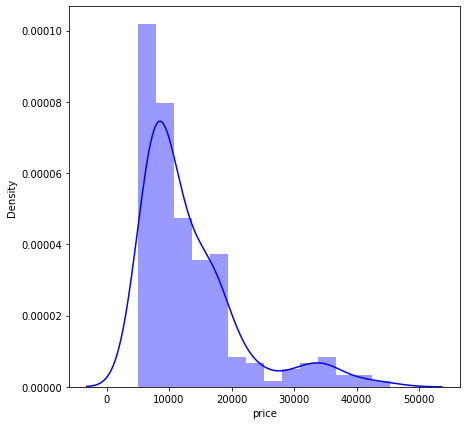

In [12]:
# Dependent variable 'Price' distribution
plt.figure(figsize=(7,7))
sns.distplot(dataset['price'],color="b")

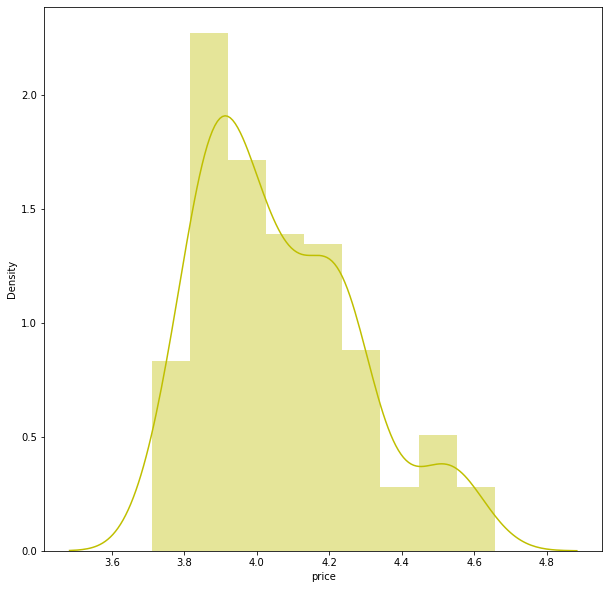

In [13]:
#Log transformation for right skewed distribution
plt.figure(figsize=(10,10))
sns.distplot(np.log10(dataset['price']),color='y')

In [14]:
numeric_features = dataset.describe().columns
numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

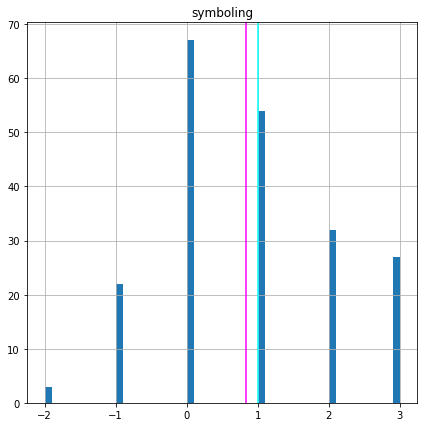

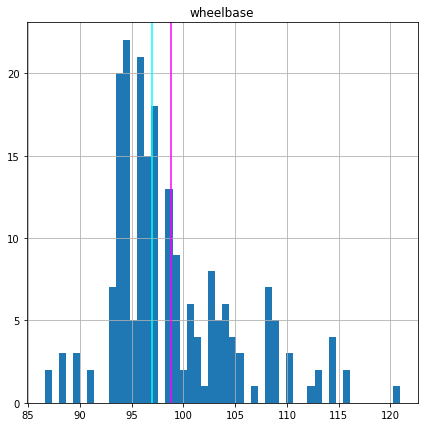

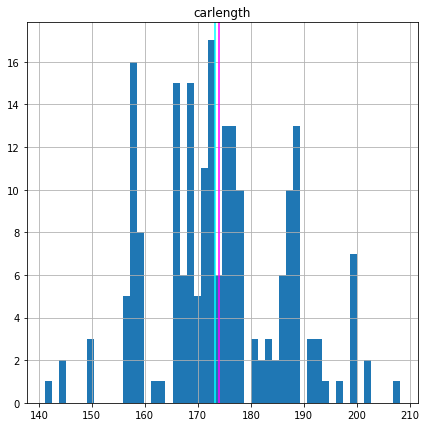

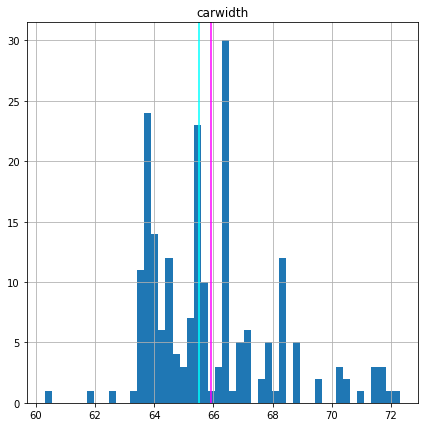

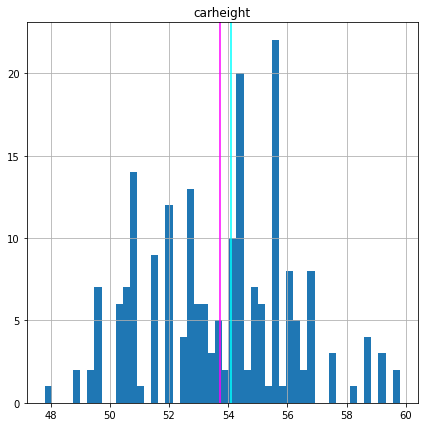

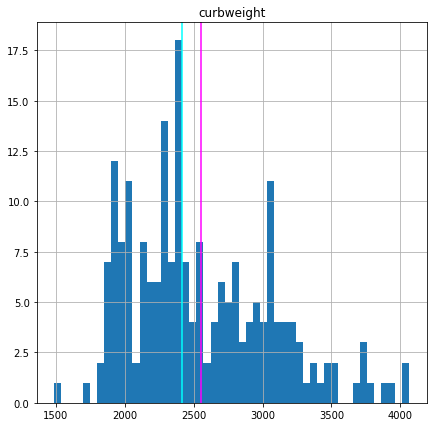

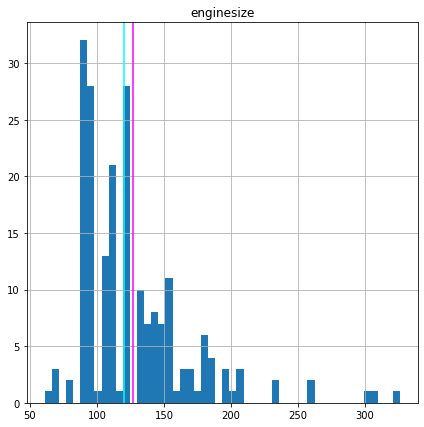

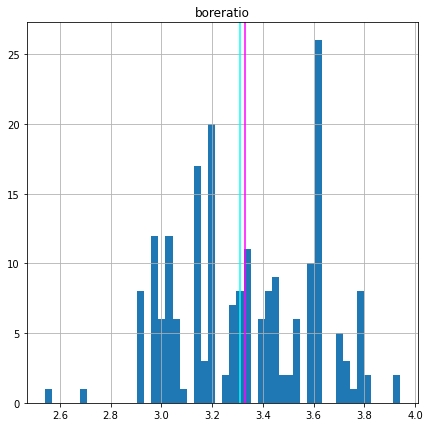

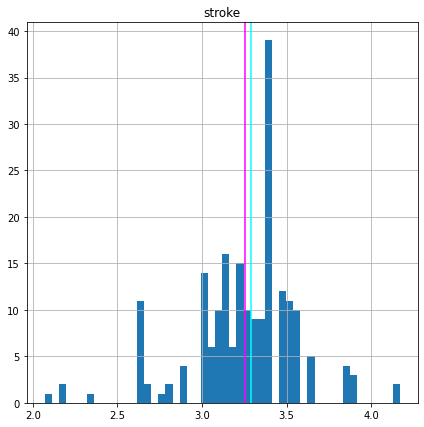

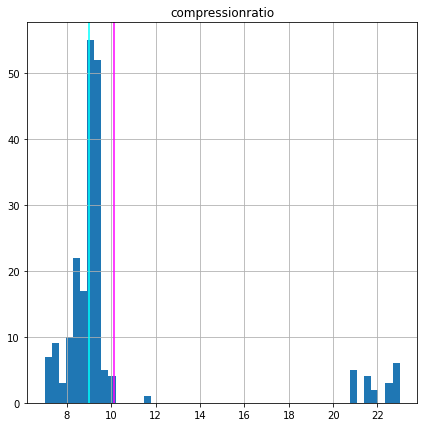

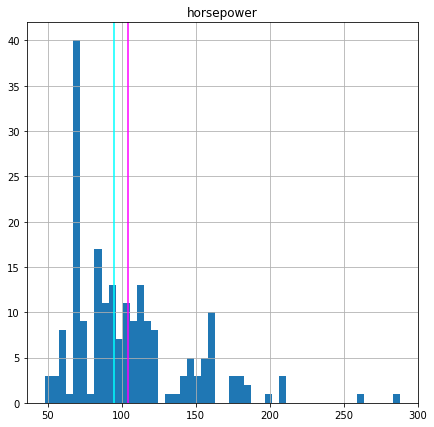

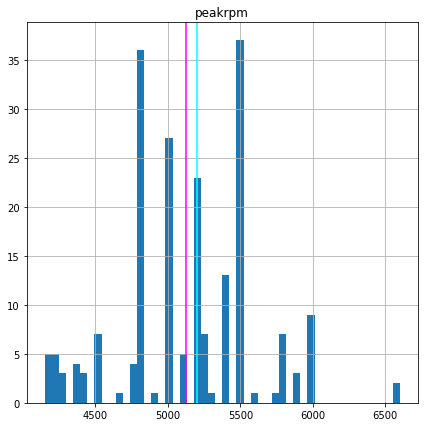

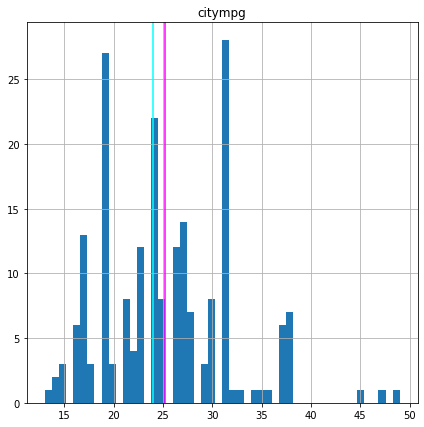

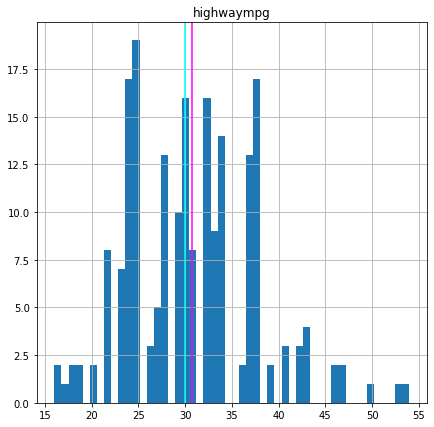

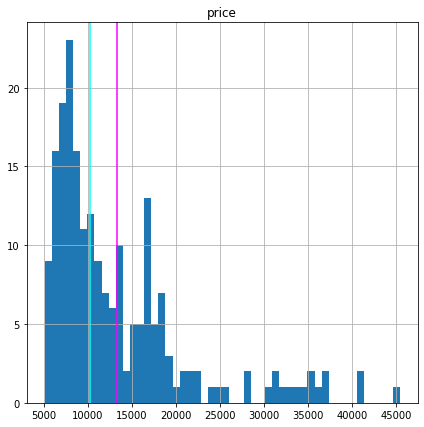

In [15]:
#plot a bar plot for each numerical feature count
for col in numeric_features[1:]:
  fig = plt.figure(figsize=(7,7))
  ax= fig.gca()
  feature = dataset[col]
  feature.hist(bins = 50, ax=ax)
  ax.axvline(feature.mean(), color='magenta')
  ax.axvline(feature.median(), color= 'cyan')
  ax.set_title(col)
plt.show()

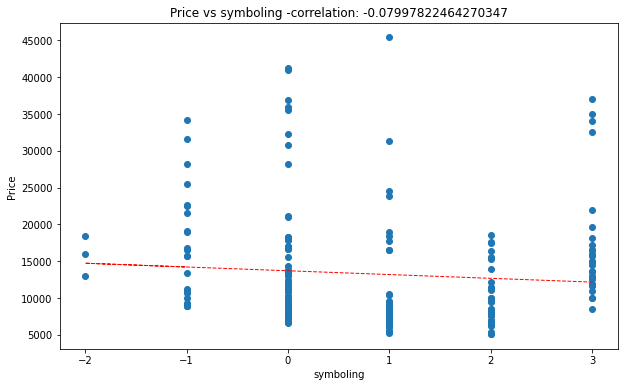

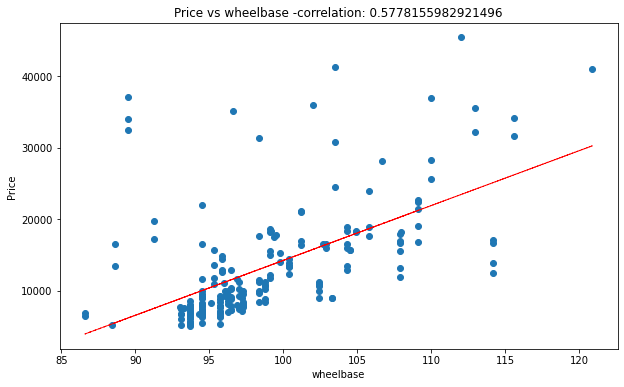

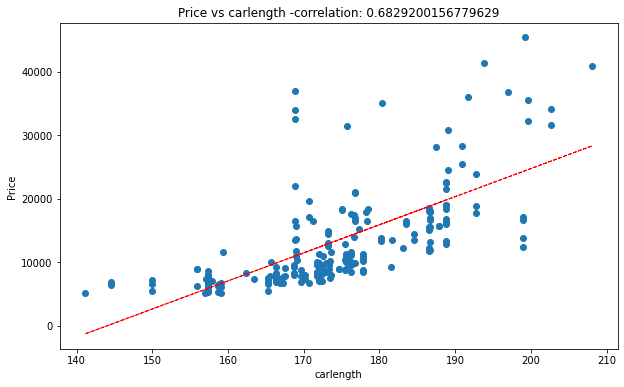

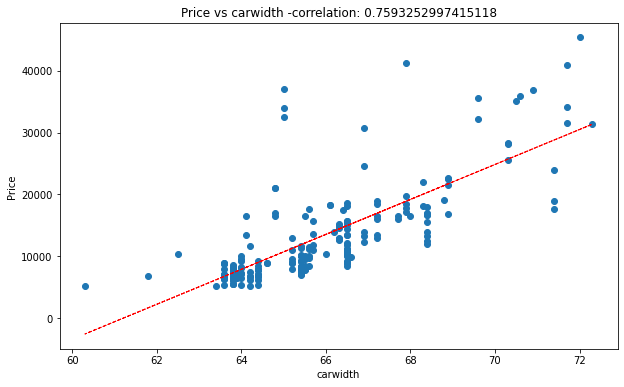

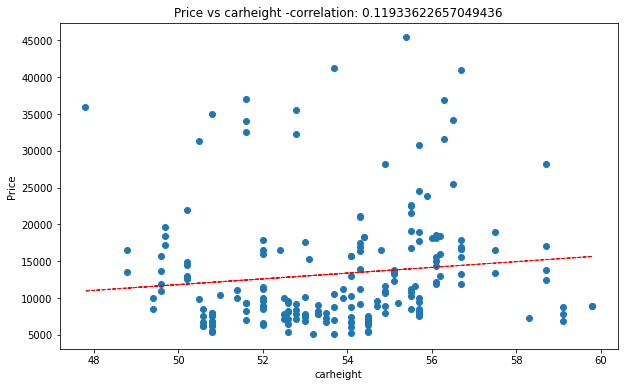

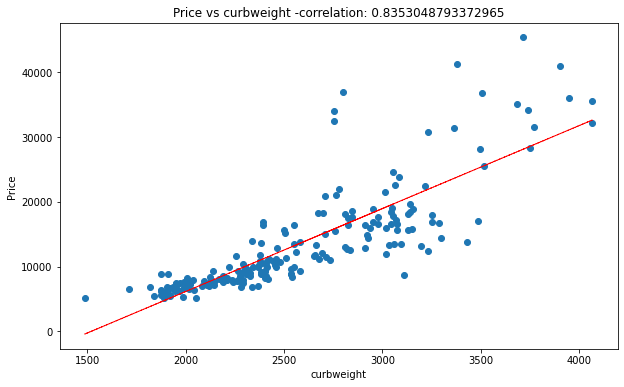

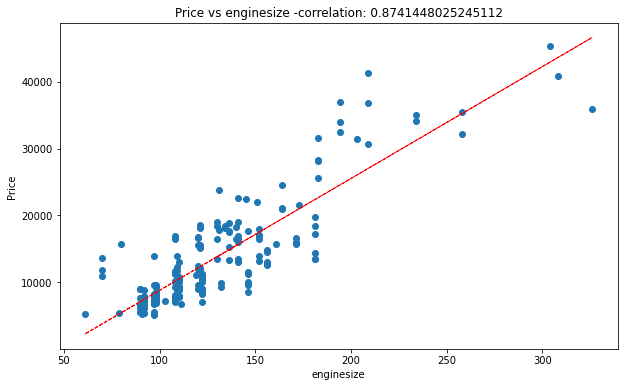

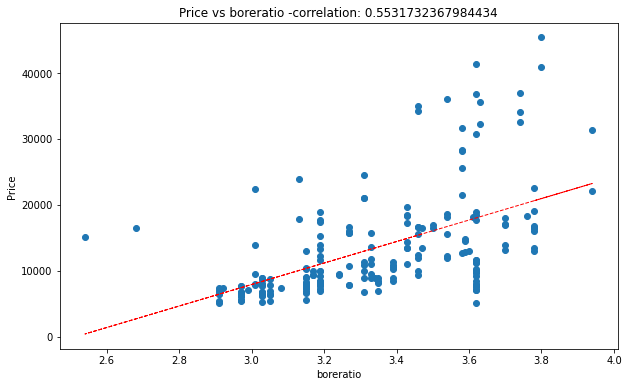

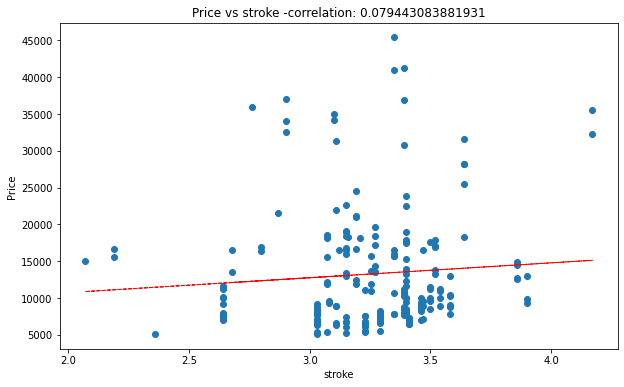

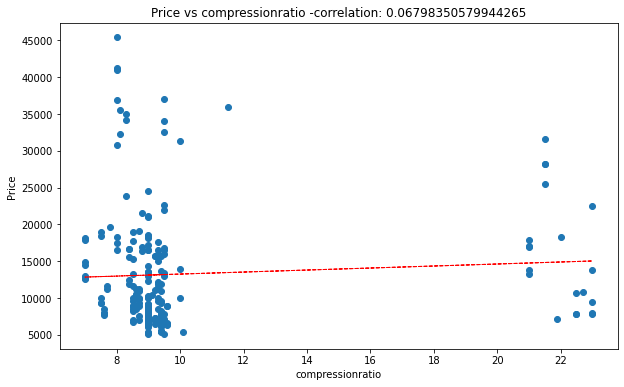

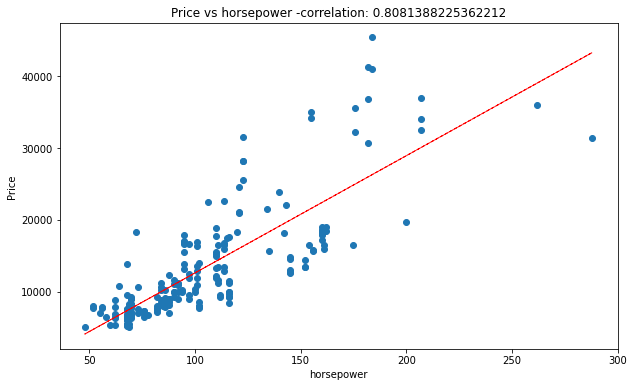

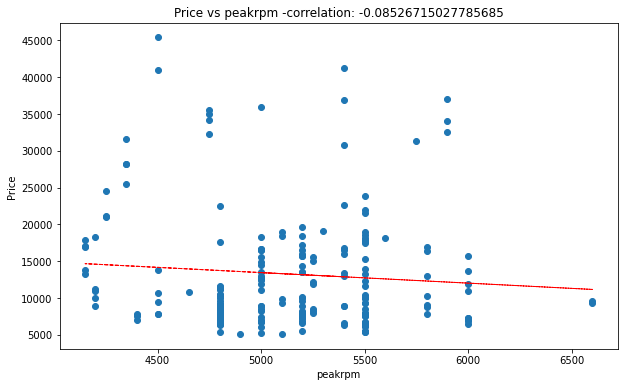

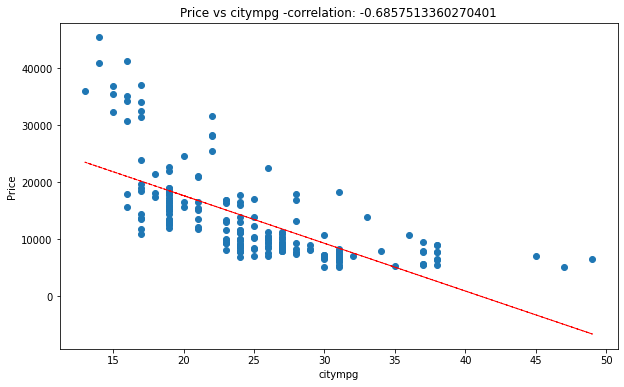

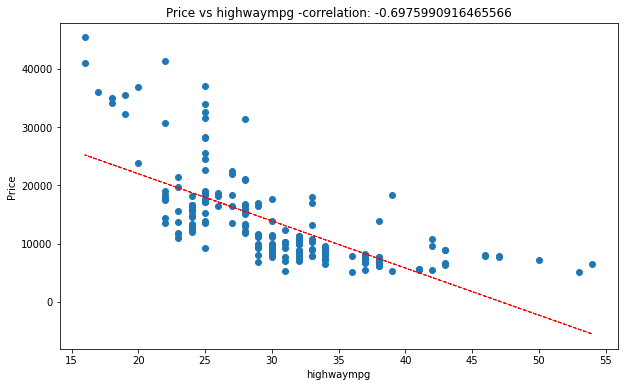

In [16]:
for col in numeric_features[1:-1]:
  # define figure objects
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  # assigning the feature and label variables
  feature = dataset[col]
  label = dataset['price']
  #Getting the correlation
  correlation = feature.corr(label)
  #Plotting the Scatter plot
  plt.scatter(x=feature, y= label)
  plt.xlabel(col)
  plt.ylabel('Price')
  ax.set_title('Price vs '+col+' -correlation: '+str(correlation))
  # getting the regression line
  z= np.polyfit(dataset[col], dataset['price'],1)
  y_hat=np.poly1d(z)(dataset[col])

  plt.plot(dataset[col], y_hat, 'r--', lw = 1)
plt.show()


## Observations from scatter plots
1. ***Symboling vs Price***: Even though Symboling is specified as Numerical data. It is itself a categorical data. The relation with dependent variable(Price) cannot be determined. The correlation is also neglible.
2. ***Wheelbase Vs Price***: The Price is linearly dependent on Wheelbase as per our plot with a good correlation value of 0.57. There are some outliers present but we can assume that it won't affect the relation.
3. ***Carlength Vs Price***: The Price is linearly dependent on Carlength as per our plot with a good correlation value of 0.68. There are some outliers present at both ends but we can assume that it won't affect the relation.
4. ***Carwidth Vs Price***: The Price is linearly dependent on Carwidth as per our plot with a very good correlation value of 0.75. There are some outliers present at both ends but we can assume that it won't affect the relation.
5. ***Carheight Vs Price***: The Price is not dependent on Carheight as per our plot. The correlation value is 0.11. 
6. ***Curbweight Vs Price***: The Price is linearly dependent on Curbweight as per our plot with a strong correlation value of 0.85. 
7. ***Enginesize Vs Price***: The Price is linearly dependent on Enginesize as per our plot with a strong correlation value of 0.87. 
8. ***Boreratio Vs Price***: The Price is linearly dependent on Boreratio as per our plot but the correlation is less.
9. ***Stroke Vs Price***: The Price is not dependent on Stroke as per our plot and the correlation is very less. 
10.  ***Compressionratio Vs Price***: The Price is not dependent on Compression as per our plot and the correlation is very less. 
11. ***Horsepower Vs Price***: The Price is linearly dependent on Horsepower as per our plot with a strong correlation value of 0.80. 
12. ***Peakrpm Vs Price***: Peakrpm is inversely correlated to Price but the correlation is very less.
13. ***Citympg Vs Price***: Citympg is inversely correlated to Price. The correlation value is 0.68 which is considered to be good.
14. ***Highwaympg Vs Price***: Highwaympg is inversely correlated to Price. The correlation value is 0.69 which is considered to be good.


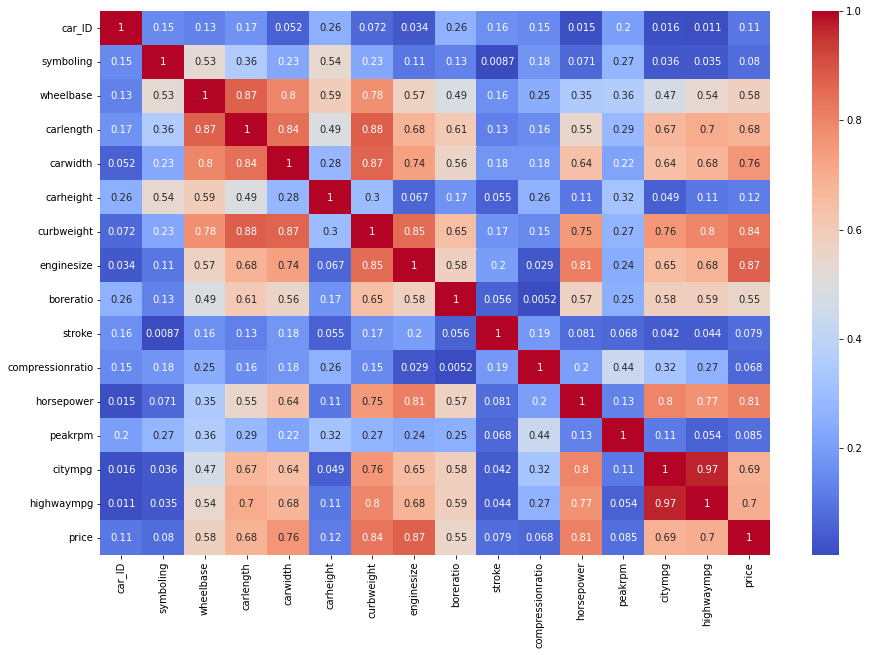

In [17]:
# Getting Heatmap to study correlation in one picture
plt.figure(figsize=(15,10))
correlation= dataset.corr()
sns.heatmap(abs(correlation), annot = True, cmap='coolwarm')

In [18]:
# Removing multicollinearity
dataset['mileage']=0.7*dataset['citympg']+0.3*dataset['highwaympg']
dataset['car_area']= dataset['carlength']*dataset['carwidth']

In [19]:
# Calculating variation_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif['variables']= X.columns
  vif["VIF"]= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return(vif)

In [20]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price','highwaympg','citympg','carlength','carwidth']]])

,variables,VIF
0,symboling,2.054465
1,wheelbase,1988.453832
2,carheight,824.099783
3,curbweight,403.067974
4,enginesize,67.562139
5,boreratio,261.049659
6,stroke,120.383999
7,compressionratio,15.909973
8,horsepower,59.148822
9,peakrpm,190.700352


Here in the above table, wheelbase has the highest vif value. In the heatmap below, we can see that the wheelbase is highly correlated to car_area. Between car_area and wheelbase, car_area has better correlation with price. So, we will exclude wheelbase from VIF table.

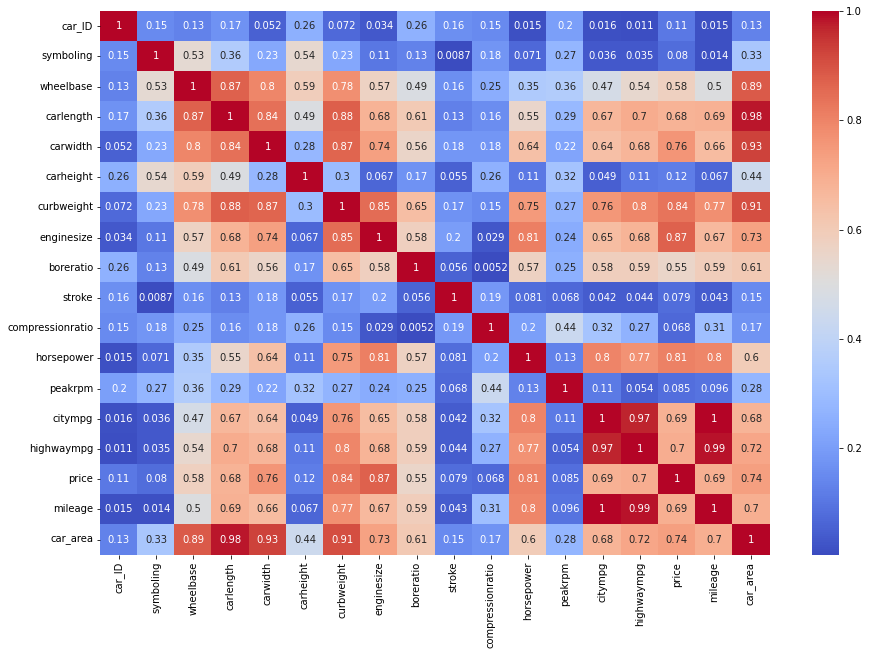

In [21]:
plt.figure(figsize=(15,10))
correlation= dataset.corr()
sns.heatmap(abs(correlation), annot = True, cmap='coolwarm')

In [22]:
calc_vif (dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price','highwaympg','citympg','carlength','carwidth','wheelbase']]])

,variables,VIF
0,symboling,1.918669
1,carheight,685.036450
2,curbweight,388.265443
3,enginesize,67.338665
4,boreratio,251.387064
5,stroke,115.199572
6,compressionratio,15.655073
7,horsepower,55.560509
8,peakrpm,180.424135
9,mileage,82.857761


Carheight is not helping much in predicting the price as it has a correlation of 0.12 with price. 

In [23]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price','highwaympg','citympg','carlength','carwidth','wheelbase','carheight']]])

,variables,VIF
0,symboling,1.875261
1,curbweight,377.247110
2,enginesize,65.892399
3,boreratio,222.808727
4,stroke,114.957622
5,compressionratio,15.260883
6,horsepower,53.275916
7,peakrpm,160.586489
8,mileage,65.101917
9,car_area,591.735108


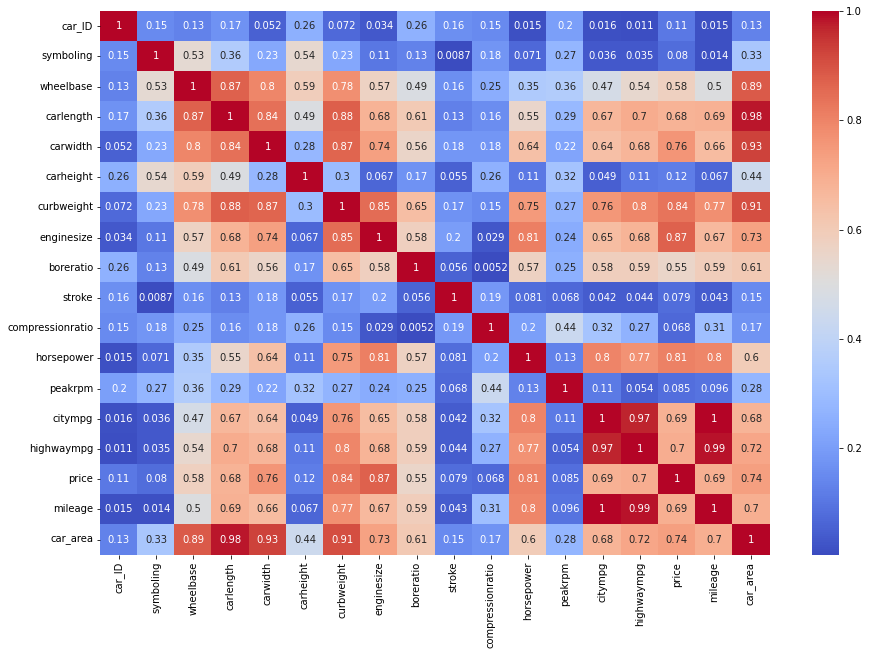

In [24]:
plt.figure(figsize=(15,10))
correlation= dataset.corr()
sns.heatmap(abs(correlation), annot = True, cmap='coolwarm')

curbweight has the highest correlation with car_area of 0.91 i.e, both the parameters are explaining the same thing. Moreover, curbweight has correlation of 0.84 with price whereas car_area has correlation of 0.74 with price. So, remove car_area

In [25]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price','highwaympg','citympg','carlength','carwidth','wheelbase','carheight','car_area']]])

,variables,VIF
0,symboling,1.817873
1,curbweight,197.375319
2,enginesize,65.885350
3,boreratio,186.648146
4,stroke,112.537637
5,compressionratio,15.246134
6,horsepower,49.118240
7,peakrpm,137.912773
8,mileage,64.352093


In the above heatmap, we can see that there are some columns which have very less correlation with price. They are symboling, stroke, compressionratio, peakrpm.

In [26]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price','highwaympg','citympg','carlength','carwidth','wheelbase','carheight','car_area','symboling','stroke','compressionratio','peakrpm']]])

,variables,VIF
0,curbweight,118.843603
1,enginesize,49.586945
2,boreratio,152.630986
3,horsepower,32.328164
4,mileage,27.656282


Enginesize has strong correlation with horsepower but when we compare both parameters correlation with price, it is enginesize which has strong relation with price as compared to horsepower.

In [27]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price','highwaympg','citympg','carlength','carwidth','wheelbase','carheight','car_area','symboling','stroke','compressionratio','peakrpm','horsepower']]])

,variables,VIF
0,curbweight,118.500292
1,enginesize,36.736290
2,boreratio,126.619152
3,mileage,20.400247


In [28]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price','highwaympg','citympg','carlength','carwidth','wheelbase','carheight','car_area','symboling','stroke','compressionratio','peakrpm','horsepower','boreratio']]])

,variables,VIF
0,curbweight,53.270630
1,enginesize,36.642624
2,mileage,7.131967


In [29]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price','highwaympg','citympg','carlength','carwidth','wheelbase','carheight','car_area','symboling','stroke','peakrpm','horsepower','boreratio','curbweight']]])

,variables,VIF
0,enginesize,5.143983
1,compressionratio,9.175480
2,mileage,8.169561


In [30]:
numerical_features=['enginesize','compressionratio','mileage']

EDA on Categorical values

In [31]:
dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [32]:
dataset['company']=dataset['CarName'].str.split(" ",expand= True)[0]

In [33]:
dataset['company'].value_counts().sort_index()

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: company, dtype: int64

In [34]:
dataset['company']= dataset['company'].replace({'toyouta':'Toyota','vw':'volkswagen', 'vokswagen':'volkswagen','Porcshce':'porsche','Nissan':'nissan','maxda':'Mazda'})
dataset['company']=dataset['company'].str.title()
dataset['company'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Isuzu           4
Porsche         4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Renault         2
Mercury         1
Porcshce        1
Name: company, dtype: int64

In [35]:
categorical_features = dataset.describe(include=['object','category']).columns

In [36]:
categorical_features

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'company'],
      dtype='object')

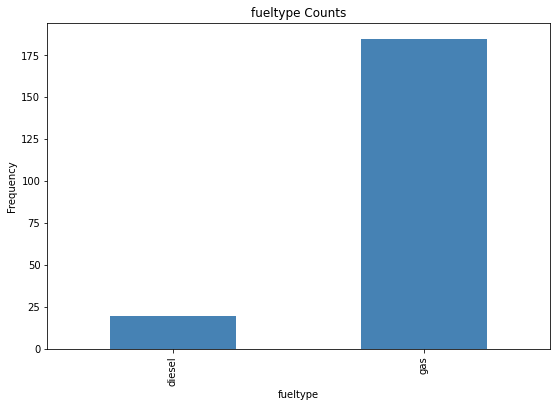

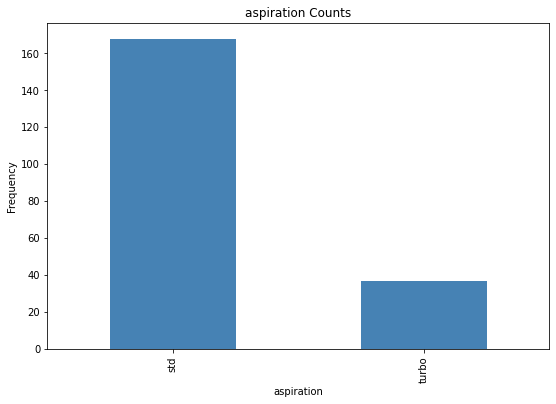

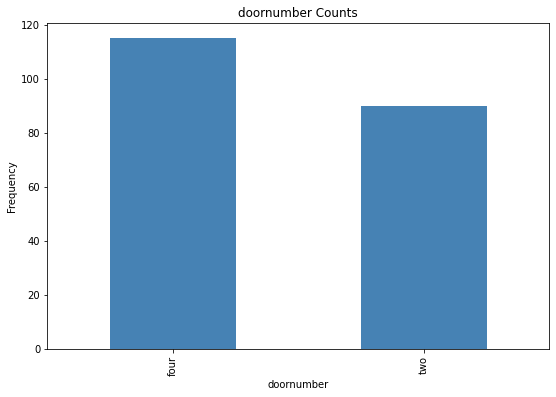

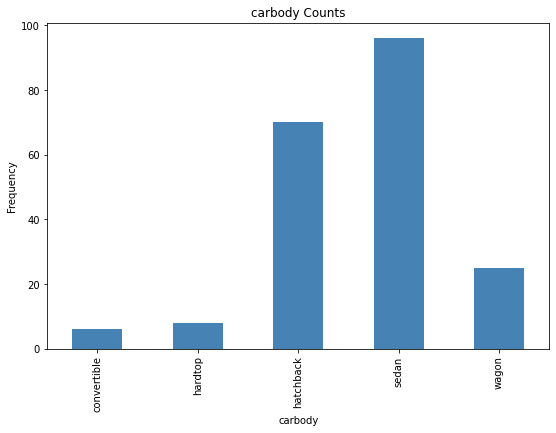

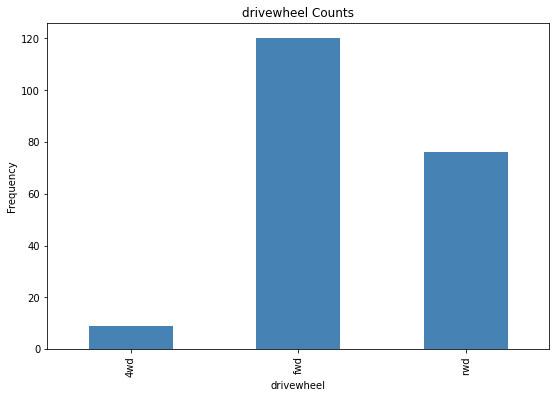

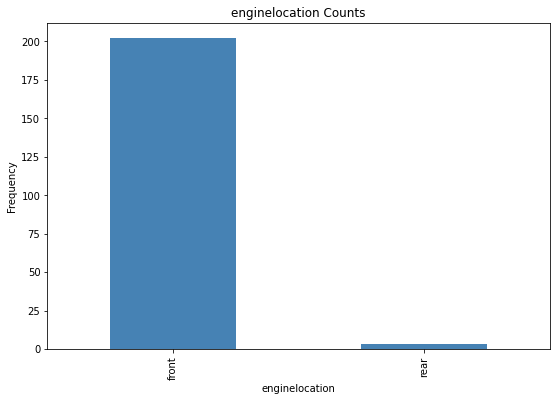

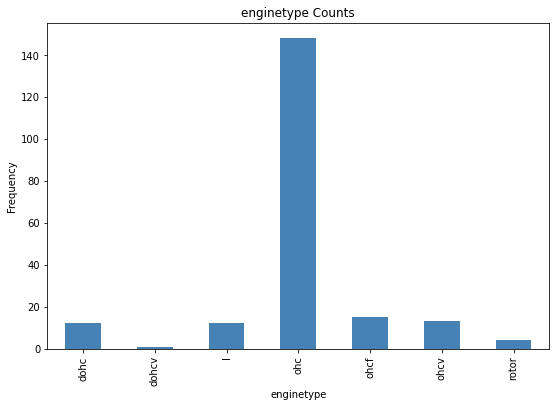

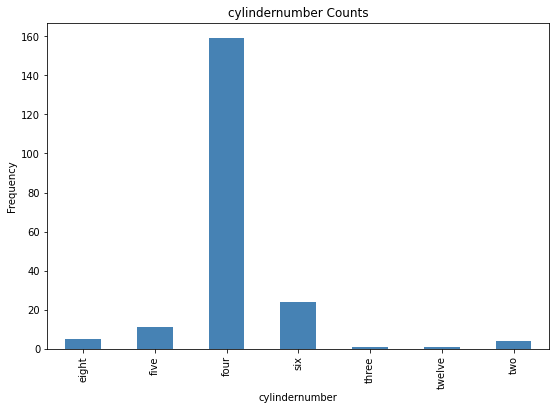

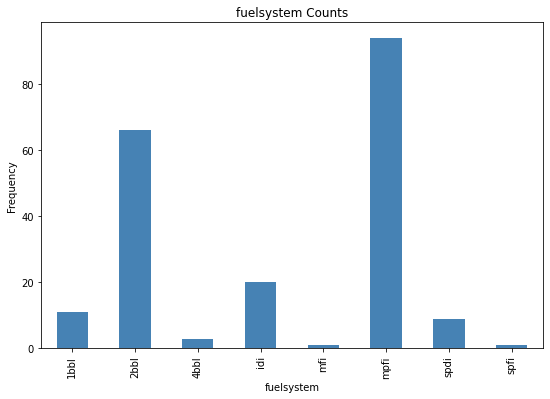

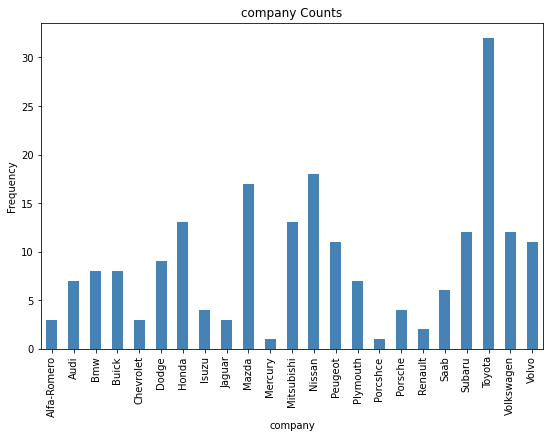

In [37]:
for col in categorical_features[1:]:
  counts = dataset[col].value_counts().sort_index()
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  counts.plot.bar(ax= ax, color='steelblue')
  ax.set_title(col + ' Counts')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')
plt.show()

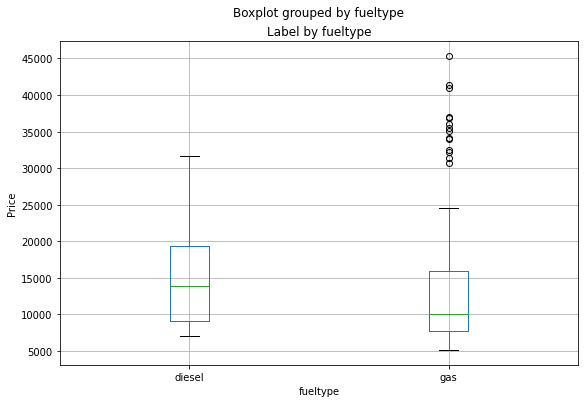

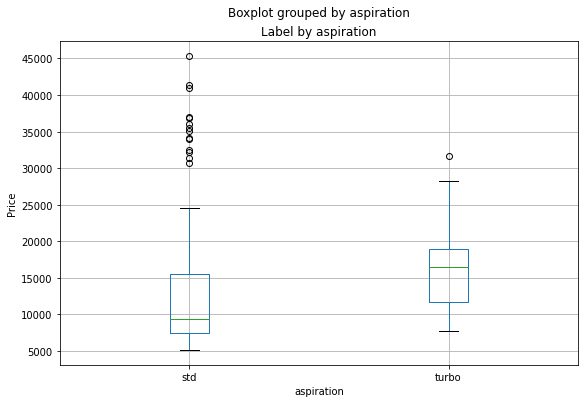

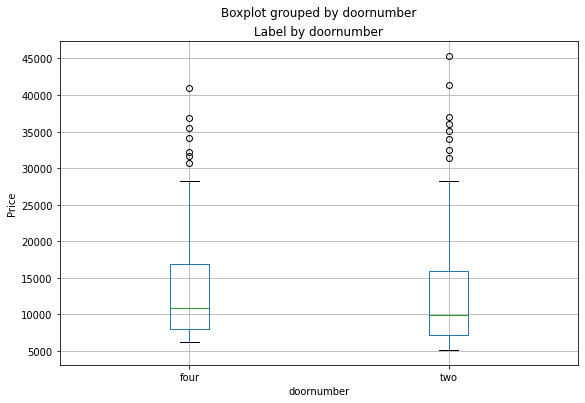

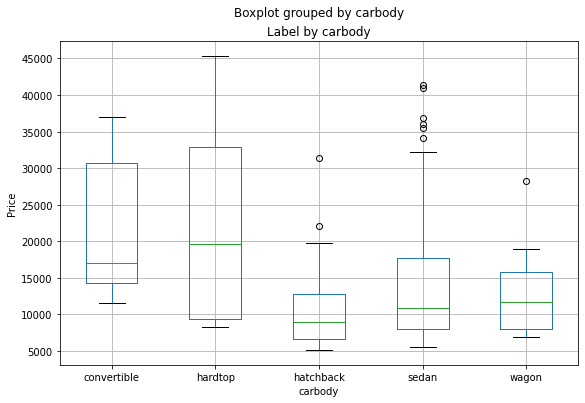

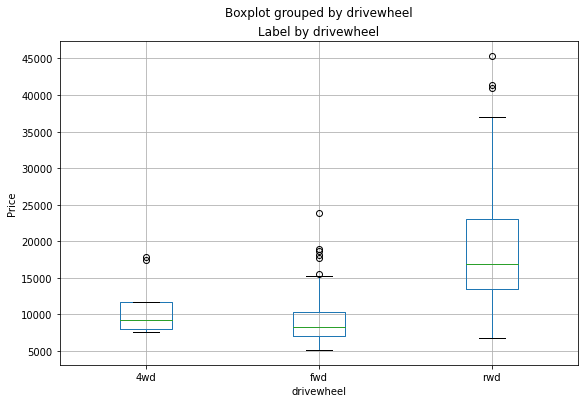

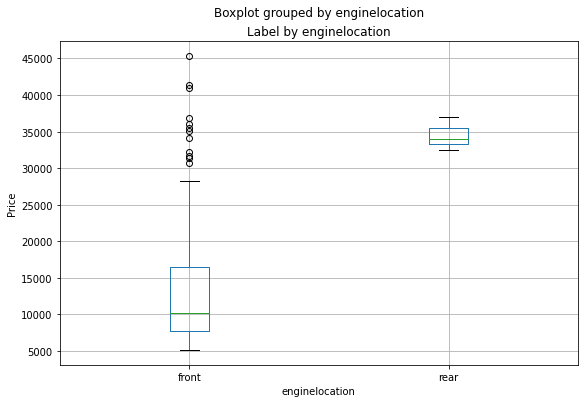

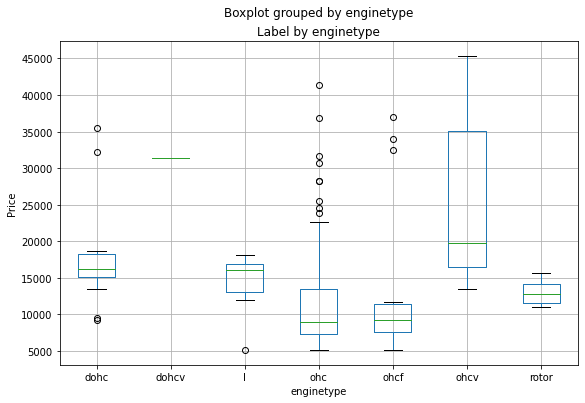

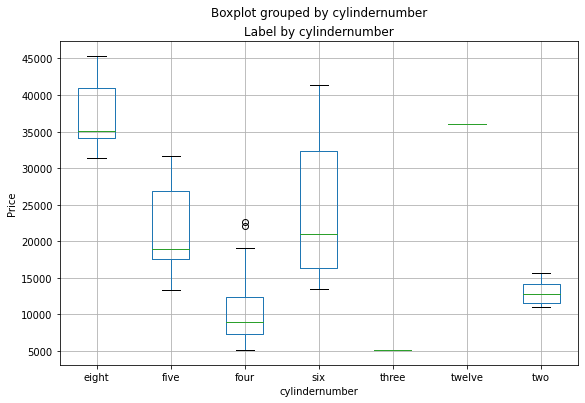

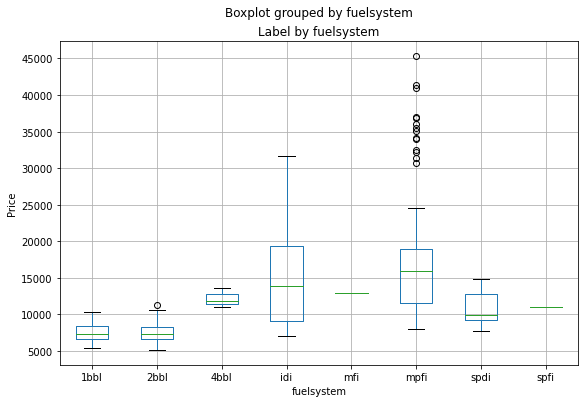

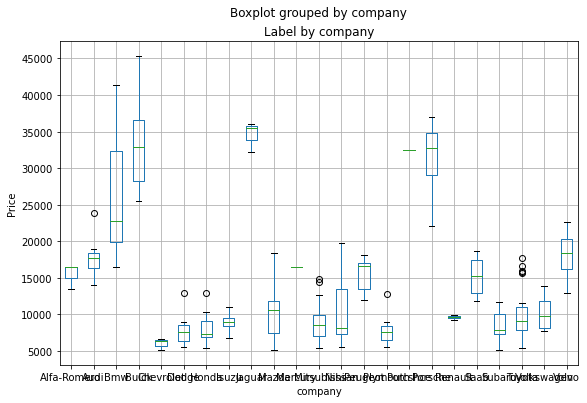

In [38]:
for col in categorical_features[1:]:
  fig = plt.figure(figsize= (9,6))
  ax = fig.gca()
  dataset.boxplot(column = 'price', by= col, ax=ax)
  ax.set_title('Label by '+ col)
  ax.set_ylabel('Price')
plt.show()

In [39]:
df_autox = pd.DataFrame(dataset.groupby(['company'])['price'].mean().sort_values(ascending = False))

In [40]:
df_autox

,price
company,
Jaguar,34600.000000
Buick,33647.000000
Porcshce,32528.000000
Porsche,31118.625000
Bmw,26118.750000
Volvo,18063.181818
Audi,17859.166714
Mercury,16503.000000
Alfa-Romero,15498.333333


<Figure size 1080x576 with 0 Axes>

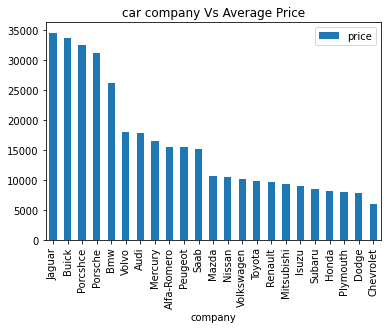

In [41]:
plt.figure(figsize = (15,8))
df_autox.plot.bar()
plt.title("car company Vs Average Price")
plt.show()

In [42]:
df_autox.rename(columns = {'price':'price_mean'},inplace = True)

In [43]:
df_autox

,price_mean
company,
Jaguar,34600.000000
Buick,33647.000000
Porcshce,32528.000000
Porsche,31118.625000
Bmw,26118.750000
Volvo,18063.181818
Audi,17859.166714
Mercury,16503.000000
Alfa-Romero,15498.333333


In [44]:
dataset = dataset.merge(df_autox, on= 'company', how= 'left')

In [45]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company,price_mean
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,13495.0,22.8,10820.08,Alfa-Romero,15498.333333
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,16500.0,22.8,10820.08,Alfa-Romero,15498.333333
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000,19,26,16500.0,21.1,11213.60,Alfa-Romero,15498.333333
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500,24,30,13950.0,25.8,11690.92,Audi,17859.166714
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500,18,22,17450.0,19.2,11726.24,Audi,17859.166714


In [46]:
dataset['company_cat']= dataset['price_mean'].apply(lambda x: 0 if x<12000 else (1 if 12000<x<24000 else 2))

In [47]:
dataset['company_cat'].value_counts()

0    142
1     39
2     24
Name: company_cat, dtype: int64

In [48]:
correlation.price

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
mileage            -0.693707
car_area            0.738052
Name: price, dtype: float64

In [49]:
# Create a copy of dataset
dataset_pr = dataset.copy()

In [50]:
# Get count of all types of fuel system
dataset.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [51]:
# Data Encoding
encoders_nums = {"fueltype": {"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 "doornumber":{"four":4,"two":2},
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four":4, "six":6,"five":5,"eight":8,
                                   "two":2,"twelve":12,"three":3}
                 }
dataset_pr = dataset_pr.replace(encoders_nums)

In [52]:
dataset_pr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company,price_mean,company_cat
0,1,3,alfa-romero giulia,0,0,2,convertible,1,front,88.6,...,111,5000,21,27,13495.0,22.8,10820.08,Alfa-Romero,15498.333333,1
1,2,3,alfa-romero stelvio,0,0,2,convertible,1,front,88.6,...,111,5000,21,27,16500.0,22.8,10820.08,Alfa-Romero,15498.333333,1
2,3,1,alfa-romero Quadrifoglio,0,0,2,hatchback,1,front,94.5,...,154,5000,19,26,16500.0,21.1,11213.60,Alfa-Romero,15498.333333,1
3,4,2,audi 100 ls,0,0,4,sedan,0,front,99.8,...,102,5500,24,30,13950.0,25.8,11690.92,Audi,17859.166714,1
4,5,2,audi 100ls,0,0,4,sedan,0,front,99.4,...,115,5500,18,22,17450.0,19.2,11726.24,Audi,17859.166714,1


In [53]:
#one hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=["carbody","enginetype","fuelsystem"],prefix=["body","etype","fsystem"])

In [54]:
dataset_pr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,1,3,alfa-romero giulia,0,0,2,1,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,0,0,2,1,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,front,94.5,171.2,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,0,0,4,0,front,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,0,0,4,0,front,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [55]:
# getting all numerical features in features
features = numerical_features.copy()
features

['enginesize', 'compressionratio', 'mileage']

In [56]:
# Extending the features list with categorical features
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl'
       , 'fsystem_idi', 'fsystem_mpfi',
       'fsystem_spdi'])

In [57]:
features

['enginesize',
 'compressionratio',
 'mileage',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_cat',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_dohc',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'fsystem_1bbl',
 'fsystem_2bbl',
 'fsystem_idi',
 'fsystem_mpfi',
 'fsystem_spdi']

In [58]:
len(features)

24

In [59]:
from scipy.stats import zscore
X = dataset_pr[features].apply(zscore) #we can use MinMaxScaler here

In [ ]:
y = np.log10()

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

NameError: ignored

In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

NameError: ignored